In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
Data=pd.read_excel("/content/Crude Oil Prices Daily.xlsx")
Data

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87
...,...,...
8218,2018-07-03,74.19
8219,2018-07-04,NaN
8220,2018-07-05,73.05
8221,2018-07-06,73.78


In [4]:
Data.isnull().any()

Date             False
Closing Value     True
dtype: bool

In [5]:
Data.isnull().sum()

Date             0
Closing Value    7
dtype: int64

In [6]:
Data.dropna(axis=0,inplace=True)
Data.isnull().sum()

Date             0
Closing Value    0
dtype: int64

In [7]:
Data_oil=Data.reset_index()['Closing Value']

In [8]:
Data_oil

0       25.56
1       26.00
2       26.53
3       25.85
4       25.87
        ...  
8211    73.89
8212    74.19
8213    73.05
8214    73.78
8215    73.93
Name: Closing Value, Length: 8216, dtype: float64

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))
Data_oil=scaler.fit_transform(np.array(Data_oil).reshape(-1,1))

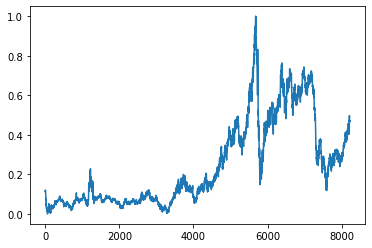

In [10]:
plt.plot(Data_oil)

In [12]:
training_size=int(len(Data_oil)*0.65)
test_size=len(Data_oil)-training_size
train_data,test_Data=Data_oil[0:training_size,:],Data_oil[training_size:len(Data_oil),:1]

In [13]:
training_size,test_size

(5340, 2876)

In [14]:
train_data.shape

(5340, 1)

In [15]:
def create_dataset(dataset, time_step=1):
  dataX, dataY = [],[]
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return np.array(dataX),np.array(dataY)  

In [16]:
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_Data, time_step)

In [17]:
print(X_train.shape),print(y_train.shape)


(5329, 10)
(5329,)


(None, None)

In [18]:
print(X_test.shape),print(ytest.shape)

(2865, 10)
(2865,)


(None, None)

In [19]:
X_train

array([[0.11335703, 0.11661484, 0.12053902, ..., 0.10980305, 0.1089886 ,
        0.11054346],
       [0.11661484, 0.12053902, 0.11550422, ..., 0.1089886 , 0.11054346,
        0.10165852],
       [0.12053902, 0.11550422, 0.1156523 , ..., 0.11054346, 0.10165852,
        0.09906708],
       ...,
       [0.36731823, 0.35176958, 0.36080261, ..., 0.36391234, 0.37042796,
        0.37042796],
       [0.35176958, 0.36080261, 0.35354657, ..., 0.37042796, 0.37042796,
        0.37879461],
       [0.36080261, 0.35354657, 0.35295424, ..., 0.37042796, 0.37879461,
        0.37916482]])

In [20]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

Model building

In [21]:
import tensorflow
import keras



In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [23]:
model=Sequential()

In [24]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(10,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [27]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
84/84 [==============================] - 6s 28ms/step - loss: 0.0018 - val_loss: 8.3986e-04
Epoch 2/50
84/84 [==============================] - 1s 15ms/step - loss: 1.2842e-04 - val_loss: 8.9464e-04
Epoch 3/50
84/84 [==============================] - 1s 16ms/step - loss: 1.2816e-04 - val_loss: 7.9099e-04
Epoch 4/50
84/84 [==============================] - 1s 15ms/step - loss: 1.2208e-04 - val_loss: 7.9829e-04
Epoch 5/50
84/84 [==============================] - 1s 15ms/step - loss: 1.2394e-04 - val_loss: 9.3060e-04
Epoch 6/50
84/84 [==============================] - 1s 16ms/step - loss: 1.2109e-04 - val_loss: 7.7402e-04
Epoch 7/50
84/84 [==============================] - 1s 15ms/step - loss: 1.2363e-04 - val_loss: 0.0012
Epoch 8/50
84/84 [==============================] - 1s 16ms/step - loss: 1.1650e-04 - val_loss: 0.0014
Epoch 9/50
84/84 [==============================] - 1s 16ms/step - loss: 1.2481e-04 - val_loss: 9.3140e-04
Epoch 10/50
84/84 [==============================

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
import tensorflow as tf
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

90/90 [==============================] - 0s 4ms/step


In [30]:
train_predict= scaler.inverse_transform(train_predict)
test_predict=  scaler.inverse_transform(test_predict)

In [31]:
import math 
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

29.664988895009063

In [32]:
math.sqrt(mean_squared_error(ytest,test_predict))

78.69090633694564

In [33]:
from tensorflow.keras.models import load_model


In [34]:
model.save("crude_oil.h5")

!tar -zcvf crude-oil-prediction.tgz crude_oil.h5

crude_oil.h5


# **IBM Deployment**

In [35]:
!pip install watson-machine-learning-client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 538 kB 34.7 MB/s 
     |████████████████████████████████| 132 kB 65.2 MB/s 
     |████████████████████████████████| 55 kB 4.6 MB/s 
     |████████████████████████████████| 9.9 MB 70.4 MB/s 
     |████████████████████████████████| 79 kB 9.1 MB/s 
     |████████████████████████████████| 140 kB 79.7 MB/s 
     |████████████████████████████████| 956 kB 46.6 MB/s 
     |████████████████████████████████| 135 kB 90.5 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.12.0-py3-none-any.whl size=73931 sha256=fa2ce9b2d1ef27ad3cc4d1bd4761206412708aa16114c68694de22e6498ba255
  Stored in directory: /root/.cache/pip/wheels/ec/94/29/2b57327cf00664b6614304f7958abd29d77ea0e5bbece2ea57
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.12.0-py3-none-any.whl size=562962 sha256=6a1efe3857

In [36]:
!pip install ibm_watson_machine_learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 29.9 MB/s 
     |████████████████████████████████| 51 kB 652 kB/s 
     |████████████████████████████████| 824 kB 73.4 MB/s 
     |████████████████████████████████| 133 kB 77.9 MB/s 
     |████████████████████████████████| 547 kB 66.4 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.7.0-py2.py3-none-any.whl size=72563 sha256=27e1f024aea649abae4a6cf8ca0c2f7b717778aab40ebbf31b166d810bee341b
  Stored in directory: /root/.cache/pip/wheels/47/22/bf/e1154ff0f5de93cc477acd0ca69abfbb8b799c5b28a66b44c2
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.7.0-py2.py3-none-any.whl size=501013 sha256=ba9ab2ac5255fb73eae39fd0ca16476665ea5f34f15c536029c81a5e89173818
  Stored in directory: /root/.cache/pip/wheels/6c/a2/e4/c16d02f809a3ea998e17cfd02c13369281f3d232aaf5902c19
  Created wheel for ibm-cos-sdk-s3transfer: filename=ibm_cos

In [37]:
from ibm_watson_machine_learning import APIClient

wml_credentials = {
    "url":"https://eu-gb.ml.cloud.ibm.com",
    "apikey":"PtWowCErj2nZ1CdUflx7yjO_B4_hdHEUt0ERh8l3NS7-"
}

client = APIClient(wml_credentials)



Python 3.7 and 3.8 frameworks are deprecated and will be removed in a future release. Use Python 3.9 framework instead.


In [38]:
client

In [39]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:eu-gb:a/b563ab05d9b4409bb925e2a1a8430f31:4f65d242-0029-49e8-a27c-082e2315a2e0::',
      'guid': '4f65d242-0029-49e8-a27c-082e2315a2e0',
      'name': 'Watson Machine Learning-yu',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'Ml_Deploy',
    'scope': {'bss_account_id': 'b563ab05d9b4409bb925e2a1a8430f31'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': 'dec74775-afd0-4a7f-8d2a-657851ab7c56',
      'bucket_region': 'eu-gb-standard',
      'credentials': {'admin': {'access_key_id': 'cac0c162a64741cc92983fd477356d42',
        'api_key': 'XmizSsaMV7W7eS4JgXrmRgIbNt9wrQs1TnbLXdXwv97V',
        'secret_access_key': '2df3eb8f45b7191aa6584c6143e923012b6ae51258214240',
        'service_id': 'ServiceId-0d519194-bd0b-4d56-9ce6-294094d9b1b3'},
       'editor': {'access_key_id': '9536a8c6e9f24790b2be3ba3f43533ef',
        'api_key

In [40]:
client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ---------  ------------------------
ID                                    NAME       CREATED
81f19fd8-e98c-4597-9ef2-44b565066dde  Ml_Deploy  2022-11-19T06:58:46.560Z
------------------------------------  ---------  ------------------------


In [41]:
space_uid="81f19fd8-e98c-4597-9ef2-44b565066dde"
space_uid

'81f19fd8-e98c-4597-9ef2-44b565066dde'

In [42]:
client.set.default_space(space_uid)

'SUCCESS'

In [43]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [44]:
software_space_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [45]:
model_details = client.repository.store_model(model="crude-oil-prediction.tgz", meta_props={
    client.repository.ModelMetaNames.NAME:"ML Model",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [46]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-19T07:40:42.956Z',
  'id': 'd80bc753-7b7a-4257-bd0a-8bd5f23d0065',
  'modified_at': '2022-11-19T07:40:46.485Z',
  'name': 'ML Model',
  'owner': 'IBMid-666002LDWX',
  'resource_key': 'a14c076f-5c61-43b7-91e7-c75ca4b667a7',
  'space_id': '81f19fd8-e98c-4597-9ef2-44b565066dde'},
 'system': {'warnings': []}}

In [47]:
model_id = client.repository.get_model_id(model_details)
model_id

'd80bc753-7b7a-4257-bd0a-8bd5f23d0065'

In [48]:
client.repository.download(model_id,'Crude_Oil_IBM_Model.tgz')

Successfully saved model content to file: 'Crude_Oil_IBM_Model.tgz'


'/content/Crude_Oil_IBM_Model.tgz'

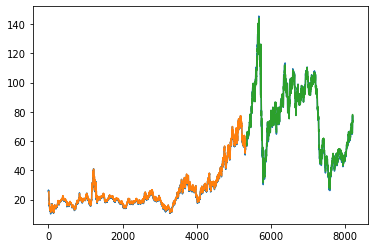

Green indicates predicated data
Blue indicates complete data
Orange indicates train data


In [49]:
look_back=10
trainPredictPlot = np.empty_like(Data_oil)
trainPredictPlot[:, :]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]= train_predict
testPredictPlot = np.empty_like(Data_oil)
testPredictPlot[:, :]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(Data_oil)-1, :]= test_predict
plt.plot(scaler.inverse_transform(Data_oil))
plt.plot(trainPredictPlot,label="traindata")
plt.plot(testPredictPlot,label="testdata")
plt.show()
print("Green indicates predicated data")
print("Blue indicates complete data")
print("Orange indicates train data")

In [50]:
len(test_Data)

2876

In [51]:
X_input=test_Data[2866:].reshape(1,-1)
X_input.shape

(1, 10)

In [52]:
temp_input=list(X_input)
temp_input=temp_input[0].tolist()

In [53]:
temp_input

[0.44172960165852215,
 0.48111950244335855,
 0.49726047682511476,
 0.4679401747371539,
 0.4729749740855915,
 0.47119798608026064,
 0.47341922108692425,
 0.4649785280616022,
 0.4703835332444839,
 0.47149415074781587]

In [54]:
lst_output=[]
n_steps=10
i=0
while(i<10):
  if(len(temp_input)>10):
    X_input=np.array(temp_input[1:])
    print("{} Day input {}".format(i,X_input))
    X_input=X_input.reshape(1,-1)
    X_input=X_input.reshape((1,n_steps,1))   
    yhat=model.predict(X_input, verbose=0)
    print("{} Day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    lst_output.extend(yhat.tolist())
    i=i+1
  else:
    X_input=X_input.reshape((1,n_steps,1))
    yhat=model.predict(X_input, verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i=i+1

[0.47460264]
11
1 Day input [0.4811195  0.49726048 0.46794017 0.47297497 0.47119799 0.47341922
 0.46497853 0.47038353 0.47149415 0.47460264]
1 Day output [[0.47823492]]
2 Day input [0.49726048 0.46794017 0.47297497 0.47119799 0.47341922 0.46497853
 0.47038353 0.47149415 0.47460264 0.47823492]
2 Day output [[0.4815359]]
3 Day input [0.46794017 0.47297497 0.47119799 0.47341922 0.46497853 0.47038353
 0.47149415 0.47460264 0.47823492 0.48153591]
3 Day output [[0.4841711]]
4 Day input [0.47297497 0.47119799 0.47341922 0.46497853 0.47038353 0.47149415
 0.47460264 0.47823492 0.48153591 0.48417109]
4 Day output [[0.4863952]]
5 Day input [0.47119799 0.47341922 0.46497853 0.47038353 0.47149415 0.47460264
 0.47823492 0.48153591 0.48417109 0.48639521]
5 Day output [[0.48804268]]
6 Day input [0.47341922 0.46497853 0.47038353 0.47149415 0.47460264 0.47823492
 0.48153591 0.48417109 0.48639521 0.48804268]
6 Day output [[0.48928952]]
7 Day input [0.46497853 0.47038353 0.47149415 0.47460264 0.47823492 0

In [55]:
day_new=np.arange(1,11)
day_pred=np.arange(11,21)

In [56]:
len(Data_oil)

8216

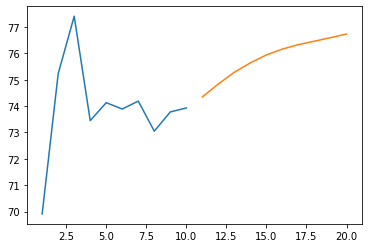

In [57]:
plt.plot(day_new,scaler.inverse_transform(Data_oil[8206:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

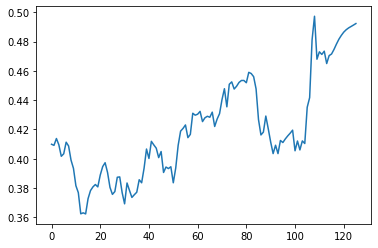

In [58]:
df3=Data_oil.tolist()
df3.extend(lst_output)
plt.plot(df3[8100:])

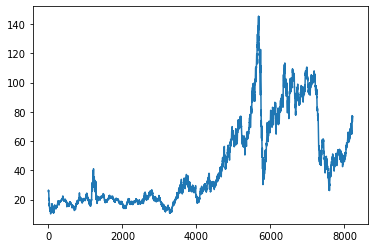

In [59]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)